In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [4]:
#mnist

In [5]:
# zmienne niezależne - atrybuty
print(mnist.data.shape)
# Target - etykiety
print(mnist.target.shape)

(70000, 784)
(70000,)


In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_lbl, test_lbl = train_test_split(mnist.data,
                                                            mnist.target,
                                                            test_size=1/7.0, #czemu akurat 1/7.0
                                                            random_state=0)

In [7]:
'''
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_set[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    print(image)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)
'''

"\nplt.figure(figsize=(20,4))\nfor index, (image, label) in enumerate(zip(train_set[0:5], train_lbl[0:5])):\n    plt.subplot(1, 5, index + 1)\n    print(image)\n    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)\n    plt.title('Training: %s\n' % label, fontsize = 20)\n"

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# wszystkie parametry niewymienione w komendzie mają ustawione wartości domyślne (sprawdz w dokumentacji ich wartosci)
# Domyślny 'solver' jest baaardzo wolny w tym przypadku, dlatego został zmieniony
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [10]:
logisticRegr.fit(train_set, train_lbl)

/home/marcin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
score = logisticRegr.score(test_set, test_lbl)
print(score)

0.9184


In [12]:
predictions = logisticRegr.predict(test_set)

In [13]:
test_set

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
    misclassifiedIndexes.append(index)
    index +=1

IndentationError: expected an indented block (<ipython-input-14-ad8aa3a24d6b>, line 7)

In [15]:
misclass = test_lbl!=predictions

In [16]:
misclass = pd.Series(misclass)
misclass= misclass[misclass==True]
misclass.index

Int64Index([47180, 61640, 45911, 40599, 34707, 23859, 17296, 65183, 41590,
            37439,
            ...
            10944, 54554, 46115, 37871,  7584, 49714, 50186, 69209, 36852,
            12190],
           dtype='int64', length=816)

In [18]:
'''
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclass.index[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_set[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)
##############
'''

"\nplt.figure(figsize=(20,4))\nfor plotIndex, badIndex in enumerate(misclass.index[0:5]):\n    plt.subplot(1, 5, plotIndex + 1)\n    plt.imshow(np.reshape(test_set[badIndex], (28,28)), cmap=plt.cm.gray)\n    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)\n##############\n"

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [22]:
## Breat Cancer data
data = pd.read_csv('cancer.xls')

In [23]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
data.shape

(569, 33)

In [25]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [26]:
data[data['id'].duplicated()].id

Series([], Name: id, dtype: int64)

In [27]:
data["Unnamed: 32"].unique()

array([nan])

In [28]:
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

/home/marcin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

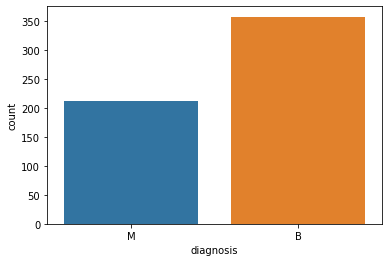

In [29]:
sns.countplot(data['diagnosis'])

In [30]:
data['diagnosis'] = data['diagnosis'].map({'M' : 1, 'B' : 0})

In [31]:
# Podzial danych na treningowe i testowe
train, test = train_test_split(data, test_size = 0.3)

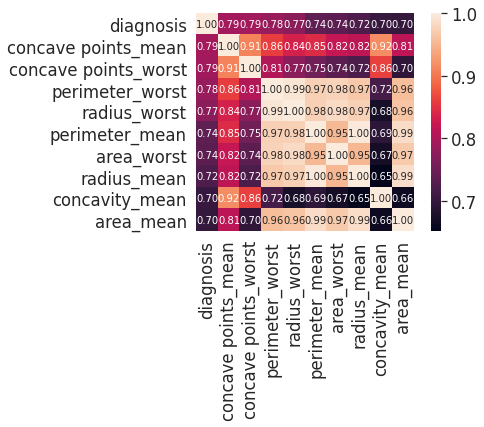

In [32]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

## Bivariate Analysis

In [33]:
features = [
    'diagnosis',
    'perimeter_se',
    'perimeter_worst',
    'concavity_worst',
    'concave points_worst',
    'texture_worst',
    'smoothness_worst',
    'symmetry_worst'
]

In [36]:
'''
sns.set()
sns.pairplot(train[features], size = 2.5)
plt.show();
'''

'\nsns.set()\nsns.pairplot(train[features], size = 2.5)\nplt.show();\n'

In [37]:
## Brakujące dane
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
diagnosis,0,0.0
compactness_se,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0


## Univariate Analysis

/home/marcin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='perimeter_se'>

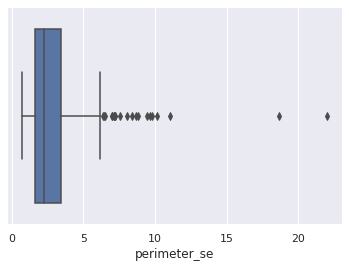

In [38]:
# zmienna: perimeter_se
sns.boxplot(train['perimeter_se'])

In [39]:
# usunięcie outliersów
train = train[train['perimeter_se'] < 15]

/home/marcin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


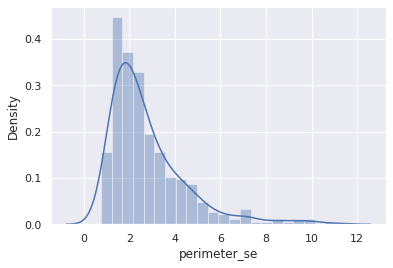

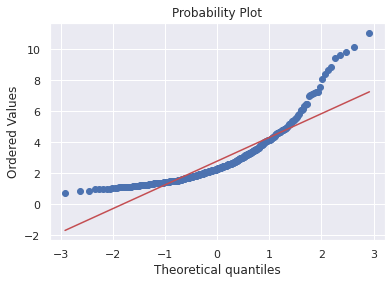

In [40]:
sns.distplot(train['perimeter_se'])
fig = plt.figure()
res = stats.probplot(train['perimeter_se'], plot=plt)

## Klasyfikator

In [41]:
predictors = features[2:]

train_X = train[predictors]
train_y = train.diagnosis

test_X = test[predictors]
test_y = test.diagnosis

In [47]:
train_y

194    1
96     0
256    1
303    0
366    1
      ..
42     1
289    0
434    0
483    0
184    1
Name: diagnosis, Length: 396, dtype: int64

In [42]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [43]:
predictions = model.predict(test[predictors])
accuracy = metrics.accuracy_score(predictions, test['diagnosis'])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 95.906%


In [44]:
metrics.roc_auc_score(predictions, test['diagnosis'])

0.9607294188861987

In [45]:
confusion_matrix(test['diagnosis'], predictions)

array([[107,   2],
       [  5,  57]])